<a href="https://colab.research.google.com/github/jayesh0902/The-Capstone-Project-4/blob/main/The_capstone_project_4_(Unsupervised_ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name : Netflix Movies and TV Shows Clustering**

Project Type : Unsupervised ML


Contribution : Team Project

Team Member 1 : Pavankumar Kashyap

Team Member 2 : Jayesh Hete

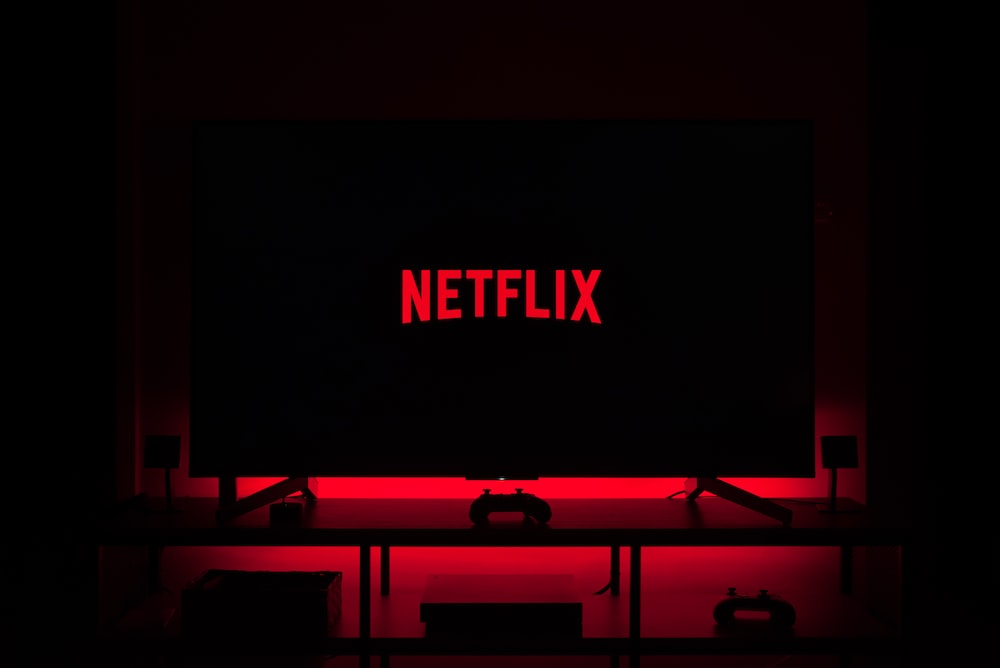

# **Project Summary**

The primary goal of this project is to analyse and provide appropriate recommendations.This process would involve grouping the data into various clusters using NLP techniques in order to attain enhanced user experience with the help of a recommender system. Clustering algorithms have been applied such as k-means, hierarchical clustering, or density-based spatial clustering which helps to group similar movies and TV shows based on their aspects. The clusters formed were then analysed to acknowledge mutual patterns and characteristics.

The project would help understand Netflix's content and would help the organization make the services better to serve their clients effectively.

## **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.
In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

# **Data Description**

show_id - Unique Id for every Movie/Tv show

type - identifier - A movie or TV show

title - title of the movie/show

director - Director of the show

cast - Actors involved

Country - Country of the production

date_added - Date it was added on netflix

release_year - Actual release year of the show

rating - TV rating of the show

duration - Total duration in minutes or number of seasons

listed_in - Genre

Description - The summary description

## **GitHub Link**

https://github.com/pawank99235/Netflix_Movies_and_TV_Shows_Clustering

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po
import plotly.io as pio

from collections import Counter
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Data Maipulation Libraries
import numpy as np
import pandas as pd
import datetime as dt

## Data Visualisation Libraray
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go


# libraries used to process textual data
import string
string.punctuation
import nltk
nltk.download('punkt')
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# libraries used to implement clusters
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram

# Library of warnings would assist in ignoring warnings issued
import warnings;warnings.filterwarnings('ignore')
import warnings;warnings.simplefilter('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#Mounting the data csv

from google.colab import drive
from google.colab import files
source_file = files.upload()

Saving NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv to NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv


In [ ]:
import pandas as pd
import io
dataset = pd.read_csv(io.BytesIO(source_file['NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv']), encoding= 'unicode_escape')

In [ ]:
# Here's our dataset
dataset.describe(include = 'all')

show_id   type title                 director                cast  \
count     7787   7787  7787                     5398                7069   
unique    7787      2  7787                     4049                6831   
top         s1  Movie    3%  RaÃºl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                       18                  18   
mean       NaN    NaN   NaN                      NaN                 NaN   
std        NaN    NaN   NaN                      NaN                 NaN   
min        NaN    NaN   NaN                      NaN                 NaN   
25%        NaN    NaN   NaN                      NaN                 NaN   
50%        NaN    NaN   NaN                      NaN                 NaN   
75%        NaN    NaN   NaN                      NaN                 NaN   
max        NaN    NaN   NaN                      NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7280             7777   7787.000000   7780      7787   
unique            681             1565           NaN     14       216   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2555              118           NaN   2863      1608   
mean              NaN              NaN   2013.932580    NaN       NaN   
std               NaN              NaN      8.757395    NaN       NaN   
min               NaN              NaN   1925.000000    NaN       NaN   
25%               NaN              NaN   2013.000000    NaN       NaN   
50%               NaN              NaN   2017.000000    NaN       NaN   
75%               NaN              NaN   2018.000000    NaN       NaN   
max               NaN              NaN   2021.000000    NaN       NaN   

            listed_in                                        description  
count            7787                                               7787  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

In [ ]:
# Top most dataset
dataset.head(10)

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   
5      s6  TV Show     46        Serdar Akar   
6      s7    Movie    122    Yasir Al Yasiri   
7      s8    Movie    187     Kevin Reynolds   
8      s9    Movie    706      Shravan Kumar   
9     s10    Movie   1920       Vikram Bhatt   

                                                cast        country  \
0  JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...         Brazil   
1  DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
5  Erdal BeÅikÃ§ioÄlu, Yasemin Allen, Melis Bir...         Turkey   
6  Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...          Egypt   
7  Samuel L. Jackson, John Heard, Kelly Rowan, Cl...  United States   
8  Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...          India   
9  Rajneesh Duggal, Adah Sharma, Indraneil Sengup...          India   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   
5       July 1, 2017          2016  TV-MA   1 Season   
6       June 1, 2020          2019  TV-MA     95 min   
7   November 1, 2019          1997      R    119 min   
8      April 1, 2019          2019  TV-14    118 min   
9  December 15, 2017          2008  TV-MA    143 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   
5    International TV Shows, TV Dramas, TV Mysteries   
6                Horror Movies, International Movies   
7                                             Dramas   
8                Horror Movies, International Movies   
9     Horror Movies, International Movies, Thrillers   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...  
5  A genetics professor experiments with a treatm...  
6  After an awful accident, a couple admitted to ...  
7  After one of his high school students attacks ...  
8  When a doctor goes missing, his psychiatrist w...  
9  An architect and his wife move into a castle t...

In [ ]:
# Last 10 rows of dataset
dataset.tail(10)

show_id     type                                    title  \
7777   s7778  TV Show                              Zombie Dumb   
7778   s7779    Movie                               Zombieland   
7779   s7780  TV Show                                Zona Rosa   
7780   s7781    Movie                                      Zoo   
7781   s7782    Movie                                     Zoom   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

             director                                               cast  \
7777              NaN                                                NaN   
7778  Ruben Fleischer  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...   
7779              NaN  Manu NNa, Ana Julia YeyÃ©, Ray Contreras, Pabl...   
7780     Shlok Sharma  Shashank Arora, Shweta Tripathi, Rahul Kumar, ...   
7781     Peter Hewitt  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...   
7782      Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783      Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784              NaN                                            Nasty C   
7785              NaN                         Adriano Zumbo, Rachel Khoo   
7786         Sam Dunn                                                NaN   

                                                country          date_added  \
7777                                                NaN        July 1, 2019   
7778                                      United States    November 1, 2019   
7779                                             Mexico   November 26, 2019   
7780                                              India        July 1, 2018   
7781                                      United States    January 11, 2020   
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating   duration  \
7777          2018  TV-Y7  2 Seasons   
7778          2009      R     88 min   
7779          2019  TV-MA   1 Season   
7780          2018  TV-MA     94 min   
7781          2006     PG     88 min   
7782          2005  TV-MA     99 min   
7783          2015  TV-14    111 min   
7784          2019  TV-MA     44 min   
7785          2019  TV-PG   1 Season   
7786          2019  TV-MA     90 min   

                                              listed_in  \
7777             Kids' TV, Korean TV Shows, TV Comedies   
7778                            Comedies, Horror Movies   
7779  International TV Shows, Spanish-Language TV Sh...   
7780   Dramas, Independent Movies, International Movies   
7781                 Children & Family Movies, Comedies   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7777  While living alone in a spooky town, a young g...  
7778  Looking to survive in a world taken over by zo...  
7779  An assortment of talent takes the stage for a ...  
7780  A drug dealer starts having doubts about his t...  
7781  Dragged from civilian life, a former superhero...  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this do

In [ ]:
# Let's check how many rows and columns are present in our dataset
dataset.shape

(7787, 12)

In [ ]:
#Summary of our dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
# Columns of our dataset
dataset.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# **Duplicate and null values**


In [ ]:
# Let's check our null values in our dataset
dataset.duplicated().sum()

0

In [ ]:
dataset.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
dataset.isnull().sum().sum()

3631

In [ ]:
#Handling Null Values
dataset['cast'].fillna(value='No cast',inplace=True)
dataset['country'].fillna(value=dataset['country'].mode()[0],inplace=True)

In [ ]:
# Shape of our dataset
dataset.shape

(7787, 12)

# **Unique values**

In [ ]:
print(f"The number of unique values in: ")
print("-"*35)
for i in dataset.columns:
  print(f"'{i}' : {dataset[i].nunique()}")

The number of unique values in: 
-----------------------------------
'show_id' : 7787
'type' : 2
'title' : 7787
'director' : 4049
'cast' : 6832
'country' : 681
'date_added' : 1565
'release_year' : 73
'rating' : 14
'duration' : 216
'listed_in' : 492
'description' : 7769


In [ ]:
# Creating new features to store date, day, month and year seperately.
dataset["date_added"] = pd.to_datetime(dataset['date_added'])  # converting date_added to date time format.
dataset['day_added'] = dataset['date_added'].dt.day            # Computing day.
dataset['year_added'] = dataset['date_added'].dt.year          # Computing year.
dataset['month_added'] = dataset['date_added'].dt.month        # Computing month.

# **EDA**

Performing Exploratory Data Analysis is an essential process to analyse the data present in a graphical form to have a better understanding of the dataset.

In [ ]:
# Plotting the graph of Content addded over a years
import plotly.graph_objects as go
import pandas as pd
tv_show = dataset[dataset["type"] == "TV Show"]
movie = dataset[dataset["type"] == "Movie"]

col = "year_added"

content_1 = tv_show["year_added"].value_counts().sort_index()
content_2 = movie["year_added"].value_counts().sort_index()

trace1 = go.Scatter(x=content_1.index, y=content_1.values, name="TV Shows", marker=dict(color='#3a524b', line=dict(width=4)))
trace2 = go.Scatter(x=content_2.index, y=content_2.values, name="Movies", marker=dict(color='#dbd6d0', line=dict(width=4)))

fig = go.Figure(data=[trace1, trace2], layout=go.Layout(title="Content added over the years",title_x=0.5, legend=dict(x=0.8, y=1.1, orientation="h")))
# Display chart
fig.show()

This graph indicates that from 2008 to 2022, there were relatively fewer TV shows and movies added into the Netflix. However, starting from 2016, there was a peak shows and more content added compare to past years. In 2019, there was a significant peak in the number of movies added, while TV shows experienced a similar trend but with a lesser increase compared to movies.

In [ ]:
months_df = pd.DataFrame(dataset['month_added'].value_counts())

# Resetting the index to create a "month" column
months_df.reset_index(inplace=True)

# Renaming the columns to "month" and "count"
months_df.rename(columns={'index': 'month', 'month_added': 'count'}, inplace=True)


In [ ]:
fig = px.bar(months_df, x="month", y="count", text_auto=True, color='count', color_continuous_scale=['#f96426', '#8590bd'])
fig.update_traces(textposition='outside')
fig.update_layout(
    title={
        'text': 'Month wise Summation of Movies and TV Shows on Netflix',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1000,
        height=500,
        showlegend=True)
# fig.show()
fig.show()

This graph shows that from the months of October to December, there was noticeable surge in the number of TV shows and movies being released on the Netflix platform.

In [ ]:
labels = ['TV Show', 'Movie']
values = [dataset.type.value_counts()[1], dataset.type.value_counts()[0]]

# Colors
colors = ['#b63aa4', '#b6e7e4']

# Creating pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6)])

# Customizing layout
fig.update_layout(
    title_text='Type of Content Being Watched on Netflix',
    title_x=0.5,
    height=500,
    width=500,
    legend=dict(x=0.9),
    annotations=[dict(text='Content', font_size=20, showarrow=False)]
)

# Set colors
fig.update_traces(marker=dict(colors=colors))

This visualisation shows 69.1% of peoples are interested and watching Tv shows and 30.9% audience showing their interested in Movies.

<Axes: xlabel='month_added', ylabel='count'>

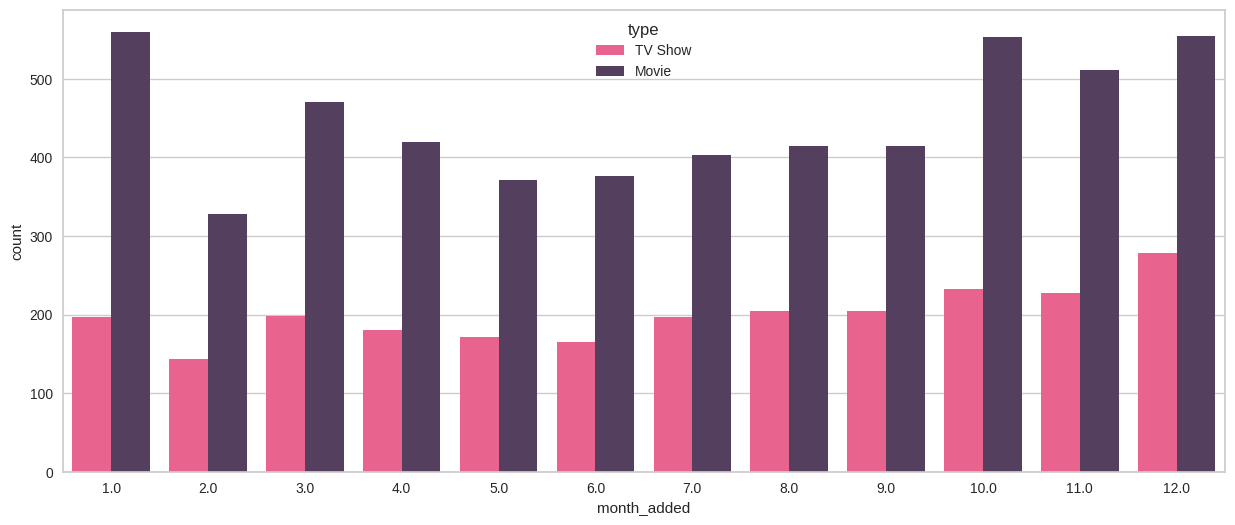

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='month_added', hue='type',lw=5, data=dataset, ax=ax,palette=['#fe4e88' ,'#563b63'])

This graph shows the trends of Movies and TV shows in Netlfix
For Movies :

January, October, and December showing the trending months for movie additions on Netflix compared to other months.

**Tv Shows:**

October, November, and December emerge as the trending months for TV show additions on Netflix compared to other months.

<Axes: title={'center': 'Distribution of duration of TV Shows'}, xlabel='duration', ylabel='count'>

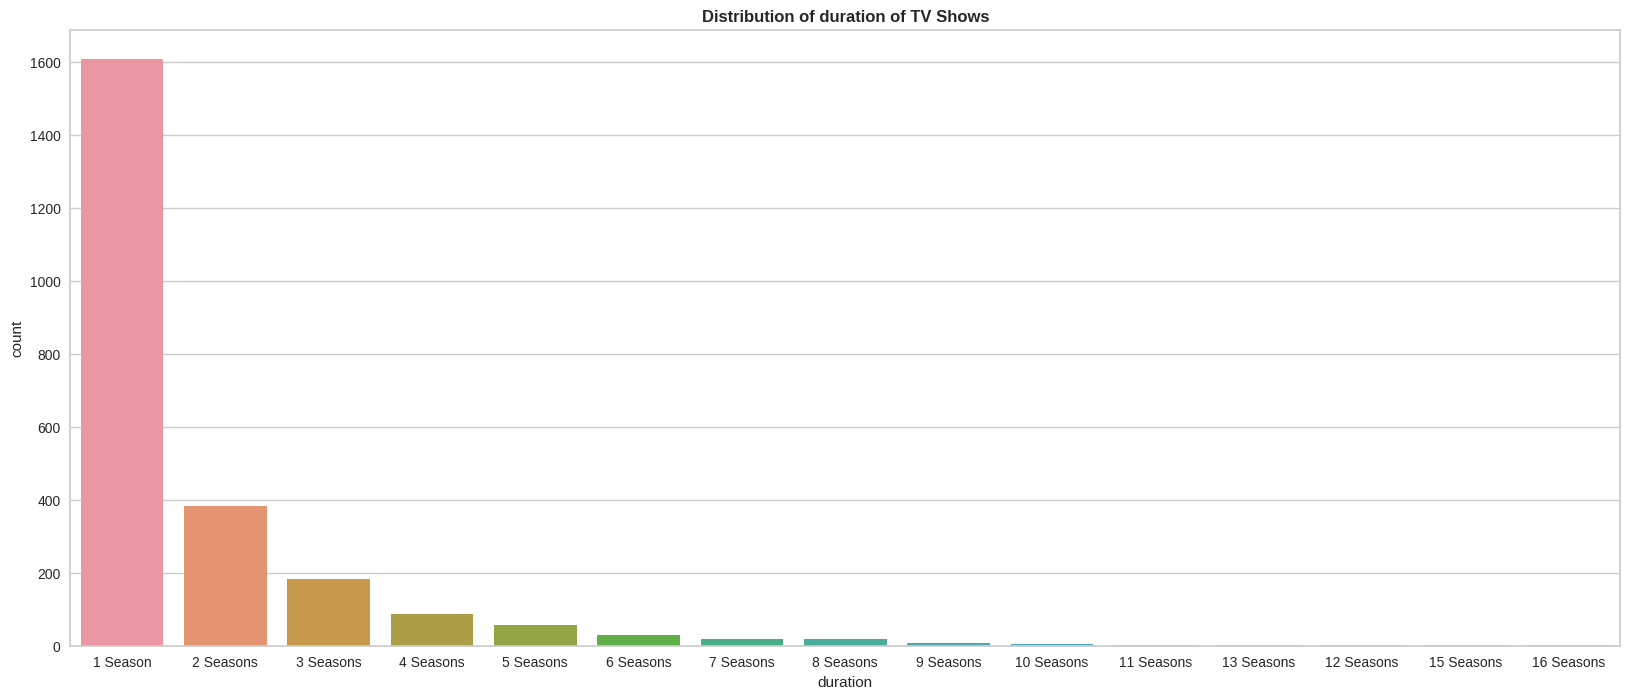

In [ ]:
plt.figure(figsize=(20,8))
plt.title("Distribution of duration of TV Shows",fontweight='bold')
sns.countplot(x=tv_show['duration'],data=tv_show,order = tv_show['duration'].value_counts().index)

From the  abovechart, we can conclude that the majority of TV shows or web series in the dataset have only one season, while the remaining shows have a maximum of two, three, four, or five seasons.

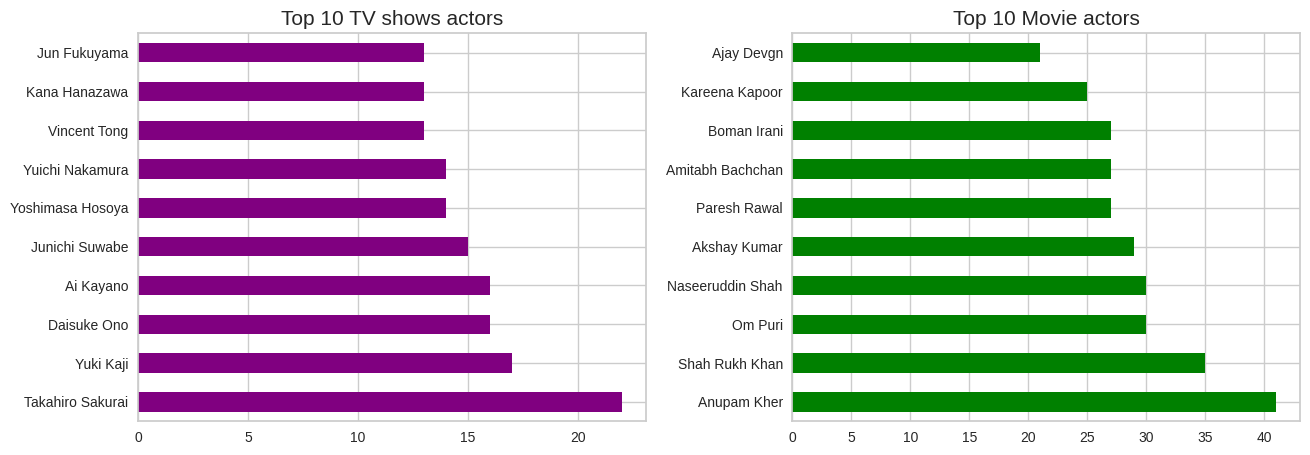

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# seperating TV shows actor from cast column
top_TVshows_actor = dataset[dataset['type']=='TV Show']['cast'].str.split(', ', expand=True).stack()
top_TVshows_actor =top_TVshows_actor[top_TVshows_actor != 'No cast']
# plotting actor who appeared in highest number of TV Show
a = top_TVshows_actor.value_counts().head(10).plot(kind='barh', ax=ax[0],color='purple')
a.set_title('Top 10 TV shows actors', size=15)

# seperating movie actor from cast column
top_movie_actor = dataset[dataset['type']=='Movie']['cast'].str.split(', ', expand=True).stack()
top_movie_actor =top_movie_actor[top_movie_actor != 'No cast']
# plotting actor who appeared in highest number of Movie
b = top_movie_actor.value_counts().head(10).plot(kind='barh', ax=ax[1],color='green')
b.set_title('Top 10 Movie actors', size=15)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()

 From the above graph, we can conclude that the TV shows category, the actor with the highest appearance is Takahiro Sakurai. In the movies category, the actor with the highest appearance is Anupam Kher.

In [ ]:
top_10_Genre = dataset['listed_in'].value_counts().head(10)

fig2 = px.pie(top_10_Genre, values=top_10_Genre.values, names=top_10_Genre.index)

custom_colors = ['#848482', '#8b7d6b', '#bf4f51', '#00008b', '#8ee5ee']
fig2.update_traces(hovertemplate=None, textposition='outside', textinfo='percent+label', rotation=0,
                   marker=dict(colors=custom_colors))

fig2.update_layout(height=600, width=900, title='Netflix Top 10 Genres',
                   margin=dict(t=100, b=30, l=0, r=0),
                   showlegend=False,
                   plot_bgcolor='#fafafa',
                   paper_bgcolor='#fafafa',
                   title_font=dict(size=20, color='#555', family="Lato, sans-serif"),
                   font=dict(size=12, color='#FF0000'),
                   hoverlabel=dict(bgcolor="#444", font_size=13, font_family="Lato, sans-serif"))

fig2.show()

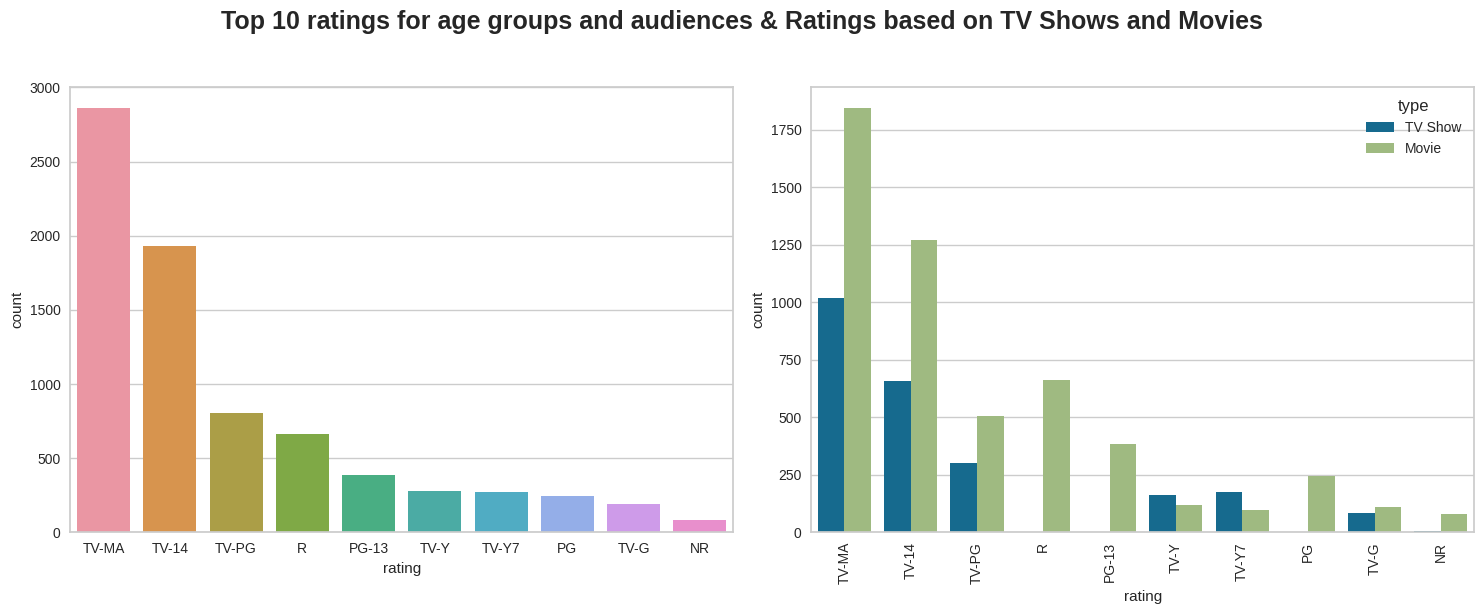

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(15,6))
plt.suptitle('Top 10 ratings for age groups and audiences & Ratings based on TV Shows and Movies',
             weight='bold', y=1.02, size=18)

# performing univariate analysis
sns.countplot(x="rating", data=dataset, order=dataset['rating'].value_counts().index[0:10], ax=ax[0])



# performing bivariate analysis
graph = sns.countplot(x="rating", data=dataset, hue='type', order=dataset['rating'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**TV-MA:** This rating means that the content is intended for mature audiences only. It may include graphic violence, explicit sexual content, or strong language

In terms of ratings, the most common rating is **TV-MA**, which applies to both movies and TV shows.

In [ ]:
directors_list = dataset.director.value_counts().reset_index().head(15)[1:]
directors_list.rename(columns={'index':'Directors name', 'director':'Count'}, inplace=True)

# Creating a bar chart using Plotly
fig = px.bar(directors_list, x='Directors name', y='Count', text_auto=True)

# Generating a list of 25 unique color codes using seaborn
color_palette = sns.color_palette('mako', n_colors=15).as_hex()
fig.update_traces(marker_color=color_palette)

# Adding a title and adjust the layout
fig.update_layout(
    title={
        'text': 'Top 25 directors with highest number of Movies and Tv Shows.',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    autosize=False,
    width=1200,
    height=500
)

# Showing the plot
fig.show()

This plot shows the directors Raúl Campos and Jan Suter have the highest count in terms of overall Movies and TV shows on Netflix.

In [ ]:
# Chart - 9 visualization code
# Create subset of dataset with required data.
conuntryVSgenre = dataset[['country', 'listed_in']]

# Create a function to seperate all genres and store counts for each.
def country_wise_genre(country):
  country_genre = conuntryVSgenre[conuntryVSgenre['country'] == country]
  #Next, the function joins all the genre strings together into a single long string using the ", ".join()
  # method and then splits the long string into a list of individual genre strings using the split() method with ", " as the separator.
  country_genre = ", ".join(country_genre['listed_in'].dropna()).split(", ")
  country_genre_dict = dict(Counter(country_genre))
  return country_genre_dict

In [ ]:
# Define list of top ten countries.
country_list = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico', 'Australia']
# Create an empty dict to store values of each genre for each country.
country_wise_genre_dict = {}
# Iterate through all values in country_list.
for i in country_list:
  genre_data = country_wise_genre(i)
  country_wise_genre_dict[i] = genre_data
  country_genre_count_df = pd.DataFrame(country_wise_genre_dict).reset_index()
  country_genre_count_df.rename({'index':'Genre'}, inplace=True, axis=1)

In [ ]:
dataset1 = country_genre_count_df

colors = ['aliceblue', 'brown', 'crimson', 'cyan', 'darkblue', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkturquoise', 'darkviolet', 'deeppink', 'forestgreen',
          'fuchsia', 'gainsboro', 'goldenrod', 'gray','maroon', 'mediumaquamarine', 'mediumvioletred', 'midnightblue', 'orchid', 'palegoldenrod', 'palegreen', 'paleturquoise',
          'plum', 'powderblue', 'purple', 'red', 'rosybrown', 'royalblue', 'saddlebrown', 'salmon', 'sandybrown','seagreen', 'seashell', 'sienna', 'silver', 'slategray', 'snow',
          'springgreen', 'tomato','yellow', 'yellowgreen', 'darkred', 'lavender', 'lightcoral', 'navy', 'olive', 'teal', 'turquoise']


# Create subplots, using 'domain' type for pie charts
specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=5, specs=specs, subplot_titles=['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico', 'Australia'])

# Define traces.
fig.add_trace(go.Pie(labels=dataset1['Genre'], values=dataset1['United States'], name='United States'),1,1)
fig.add_trace(go.Pie(labels=dataset1['Genre'], values=dataset1['India'],  name='India'),1,2)
fig.add_trace(go.Pie(labels=dataset1['Genre'], values=dataset1['United Kingdom'],  name='United Kingdom'),1,3)
fig.add_trace(go.Pie(labels=dataset1['Genre'], values=dataset1['Canada'],  name='Canada'),1,4)
fig.add_trace(go.Pie(labels=dataset1['Genre'], values=dataset1['Japan'],  name='Japan'),1,5)
fig.add_trace(go.Pie(labels=dataset1['Genre'], values=dataset1['France'],  name='France'),2,1)
fig.add_trace(go.Pie(labels=dataset1['Genre'], values=dataset1['South Korea'],  name='South Korea'),2,2)
fig.add_trace(go.Pie(labels=dataset1['Genre'], values=dataset1['Spain'],  name='Spain'),2,3)
fig.add_trace(go.Pie(labels=dataset1['Genre'], values=dataset1['Mexico'],  name='Mexico'),2,4)
fig.add_trace(go.Pie(labels=dataset1['Genre'], values=dataset1['Australia'],  name='Australia'),2,5)

# Tune layout and hover info
fig.update_traces(hoverinfo='label+percent+name', textinfo='none', marker=dict(colors=colors))
fig.update_layout(title={'text': 'Top ten countries and the content they provide.',
                          'y':0.97,
                          'x':0.5,
                          'font_size':25,
                          'xanchor': 'center',
                          'yanchor': 'top'},height=650, width=1550,paper_bgcolor='white',
                  legend=dict(x=0.099,orientation="h")
                          )
fig = go.Figure(fig)
# fig.show()
fig.show()

In [ ]:
print(dataset)

     show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...   
1     Jorge Michel Grau  DemiÃ¡n Bichir, HÃ©ctor Bo

# **Hypothesis Testing**

What is Hypothesis Testing ?

Hypothesis testing uses sample data to evaluate a hypothesis about a population

Why is it important ?

The real value of hypothesis testing in business is that it allows professionals to test their theories and assumptions before putting them into action. This essentially allows an organization to verify its analysis is correct before committing resources to implement a broader strategy

In [ ]:
netflix_hypothesis=dataset.copy()
#head of df_hypothesis
dataset.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...         Brazil   
1  DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  day_added  year_added  \
0  In a future where the elite inhabit an island ...       14.0      2020.0   
1  After a devastating earthquake hits Mexico Cit...       23.0      2016.0   
2  When an army recruit is found dead, his fellow...       20.0      2018.0   
3  In a postapocalyptic world, rag-doll robots hi...       16.0      2017.0   
4  A brilliant group of students become card-coun...        1.0      2020.0   

   month_added  
0          8.0  
1         12.0  
2         12.0  
3         11.0  
4          1.0

In [ ]:
netflix_hypothesis = netflix_hypothesis[netflix_hypothesis["type"] == "Movie"]

In [ ]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

netflix_hypothesis['target_ages'] = netflix_hypothesis['rating'].replace(ratings_ages)
#let's see unique target ages
netflix_hypothesis['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids', nan], dtype=object)

In [ ]:
netflix_hypothesis['target_ages'] = pd.Categorical(netflix_hypothesis['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

netflix_hypothesis['duration'] = netflix_hypothesis['duration'].astype(str)  # Convert to string type
netflix_hypothesis['duration'] = netflix_hypothesis['duration'].str.extract('(\d+)')
netflix_hypothesis['duration'] = pd.to_numeric(netflix_hypothesis['duration'])

In [ ]:
group_by_= netflix_hypothesis[['duration','target_ages']].groupby(by='target_ages')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

target_ages    duration
0        Kids   66.486891
1  Older Kids   92.024648
2       Teens  110.025332
3      Adults   98.275145

In [ ]:
A= group_by_.get_group('Kids')
B= group_by_.get_group('Older Kids')
#mean and std. calutation for kids and older kids variables
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(M1,M2))
print('Std for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(S2,S1))

Mean for movies rated for Kids duration    66.486891
dtype: float64 
 Mean for  movies rated for older kids duration    92.024648
dtype: float64
Std for  movies rated for Older Kids duration    31.182577
dtype: float64 
 Std for  movies rated for kids duration    31.739465
dtype: float64


In [ ]:
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

267 852
dof 1117
SP_2 = duration    999.049147
dtype: float64
SP duration    31.607739
dtype: float64
tvalue -11.51992627853396


In [ ]:
stats.t.ppf(0.025,dof)


-1.9620900365868952

In [ ]:
stats.t.ppf(0.975,dof)

1.9620900365868947

In [ ]:
#making copy of df_clean_frame
netflix_hypothesis=dataset.copy()
#head of df_hypothesis
netflix_hypothesis.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...         Brazil   
1  DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  day_added  year_added  \
0  In a future where the elite inhabit an island ...       14.0      2020.0   
1  After a devastating earthquake hits Mexico Cit...       23.0      2016.0   
2  When an army recruit is found dead, his fellow...       20.0      2018.0   
3  In a postapocalyptic world, rag-doll robots hi...       16.0      2017.0   
4  A brilliant group of students become card-coun...        1.0      2020.0   

   month_added  
0          8.0  
1         12.0  
2         12.0  
3         11.0  
4          1.0

In [ ]:
netflix_hypothesis['duration']= netflix_hypothesis['duration'].str.extract('(\d+)')
netflix_hypothesis['duration'] = pd.to_numeric(netflix_hypothesis['duration'])

In [ ]:
netflix_hypothesis['type'] = pd.Categorical(netflix_hypothesis['type'], categories=['Movie','TV Show'])
netflix_hypothesis

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...   
1     Jorge Michel Grau  DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                NaN                                            Nasty C   
7785                NaN                         Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                            No cast   

                                                country date_added  \
0                                                Brazil 2020-08-14   
1                                                Mexico 2016-12-23   
2                                             Singapore 2018-12-20   
3                                         United States 2017-11-16   
4                                         United States 2020-01-01   
...                                                 ...        ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar... 2020-10-19   
7783                                              India 2019-03-02   
7784                                      United States 2020-09-25   
7785                                          Australia 2020-10-31   
7786              United Kingdom, Canada, United States 2020-03-01   

      release_year rating  duration  \
0             2020  TV-MA         4   
1             2016  TV-MA        93   
2             2011      R        78   
3             2009  PG-13        80   
4             2008  PG-13       123   
...            ...    ...       ...   
7782          2005  TV-MA        99   
7783          2015  TV-14       111   
7784          2019  TV-MA        44   
7785          2019  TV-PG         1   
7786          2019  TV-MA        90   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  day_added  \
0     In a future where the elite inhabit an island ...       14.0   
1     After a devastating earthquake hits Mexico Cit...       23.0   
2     When an army recruit is found dead, his 

In [ ]:
netflix_hypothesis.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...         Brazil   
1  DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating  duration  \
0 2020-08-14          2020  TV-MA         4   
1 2016-12-23          2016  TV-MA        93   
2 2018-12-20          2011      R        78   
3 2017-11-16          2009  PG-13        80   
4 2020-01-01          2008  PG-13       123   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  day_added  year_added  \
0  In a future where the elite inhabit an island ...       14.0      2020.0   
1  After a devastating earthquake hits Mexico Cit...       23.0      2016.0   
2  When an army recruit is found dead, his fellow...       20.0      2018.0   
3  In a postapocalyptic world, rag-doll robots hi...       16.0      2017.0   
4  A brilliant group of students become card-coun...        1.0      2020.0   

   month_added  
0          8.0  
1         12.0  
2         12.0  
3         11.0  
4          1.0

In [ ]:
netflix_hypothesis['type'] = pd.Categorical(netflix_hypothesis['type'], categories=['Movie','TV Show'])

In [ ]:
# Performing Statistical Test to obtain P-Value
#group_by duration and TYPE
group_by_= netflix_hypothesis[['duration','type']].groupby(by='type')
#mean of group_by variable
group1=group_by_.mean().reset_index()
group1

type   duration
0    Movie  99.307978
1  TV Show   1.775934

In [ ]:
A= group_by_.get_group('Movie')
B= group_by_.get_group('TV Show')
#mean and std
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean  {}'.format(M1,M2))
print('Std  {}'.format(S2,S1))

Mean  duration    99.307978
dtype: float64
Std  duration    1.596359
dtype: float64


In [ ]:
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

5377 2410
dof 7785
SP_2 = duration    253.64841
dtype: float64
SP duration    15.926343
dtype: float64
tvalue 249.81856492927665


In [ ]:
stats.t.ppf(0.025,dof)

-1.9602687544602204

In [ ]:
stats.t.ppf(0.975,dof)

1.96026875446022

# **Feature Engineering**

In [ ]:
dataset['clustering'] = (dataset['director'] + ' ' + dataset['cast'] +' ' +
                                 dataset['country'] +' ' + dataset['listed_in'] +
                                 ' ' + dataset['description'])

In [ ]:
dataset['clustering'][25]

'Lyric R. Cabral, David Felix Sutcliffe No cast United States Documentaries This real-life look at FBI counterterrorism operations features access to both sides of a sting: the government informant and the radicalized target.'

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
import nltk
nltk.download('all',quiet=True)
from PIL import Image

def transform_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Tokenize text into words
    words = nltk.word_tokenize(text)

    # Remove non-alphanumeric characters
    words = [word for word in words if word.isalnum()]

    # Remove stopwords and punctuation
    stopwords_set = set(stopwords.words('english'))
    punctuation_set = set(string.punctuation)
    words = [word for word in words if word not in stopwords_set and word not in punctuation_set]

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Join words into a string and return
    return ' '.join(lemmatized_words)

In [ ]:
dataset.clustering = dataset.clustering.astype(str)

In [ ]:
dataset['Clean_Text'] = dataset['clustering'].apply(transform_text)

In [ ]:
dataset["Clean_Text"][50]

'roland emmerich steven strait camilla belle cliff curtis joel virgel affif ben badra mo zinal nathanael baring mona hammond omar sharif united state south africa action adventure fierce mammoth hunter set impossible journey rescue woman love vicious warlord save people village'

# **Text Vectorization**

What is Text Vectorization ?

Text Vectorization is the process of converting text into numerical representation. Here is some popular methods to accomplish text vectorization: Binary Term Frequency. Bag of Words (BoW) Term Frequency. (L1) Normalized Term Frequency.

Why is it important ?

In Machine Learning, vectorization is a step in feature extraction. The idea is to get some distinct features out of the text for the model to train on, by converting text to numerical vectors.

In [ ]:
bag_of_words = dataset.Clean_Text

In [ ]:
t_vectorizer = TfidfVectorizer(max_features=20000)
X= t_vectorizer.fit_transform(bag_of_words)

In [ ]:
print(X.shape)

(7787, 20000)


In [ ]:
t_vectorizer.get_feature_names_out()

array(['007', '10', '100', ..., 'zwart', 'zygmunt', 'zylka'], dtype=object)

# **Dimensionality Reduction**



What is Dimensionality Reduction ?

Dimensionality reduction seeks a lower-dimensional representation of numerical input data that preserves the salient relationships in the data. There are many different dimensionality reduction algorithms and no single best method for all datasets.

Why is it important ?

Dimensionality reduction is advantageous to AI developers or data professionals working with massive data sets, performing data visualization and analyzing complex data. It aids in the process of data compression, allowing the data to take up less storage space as well as reducing computation times.

What Is Principal Component Analysis?

Principal component analysis, or PCA, is a dimensionality reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
transformer = PCA()
transformer.fit(X.toarray())

PCA()

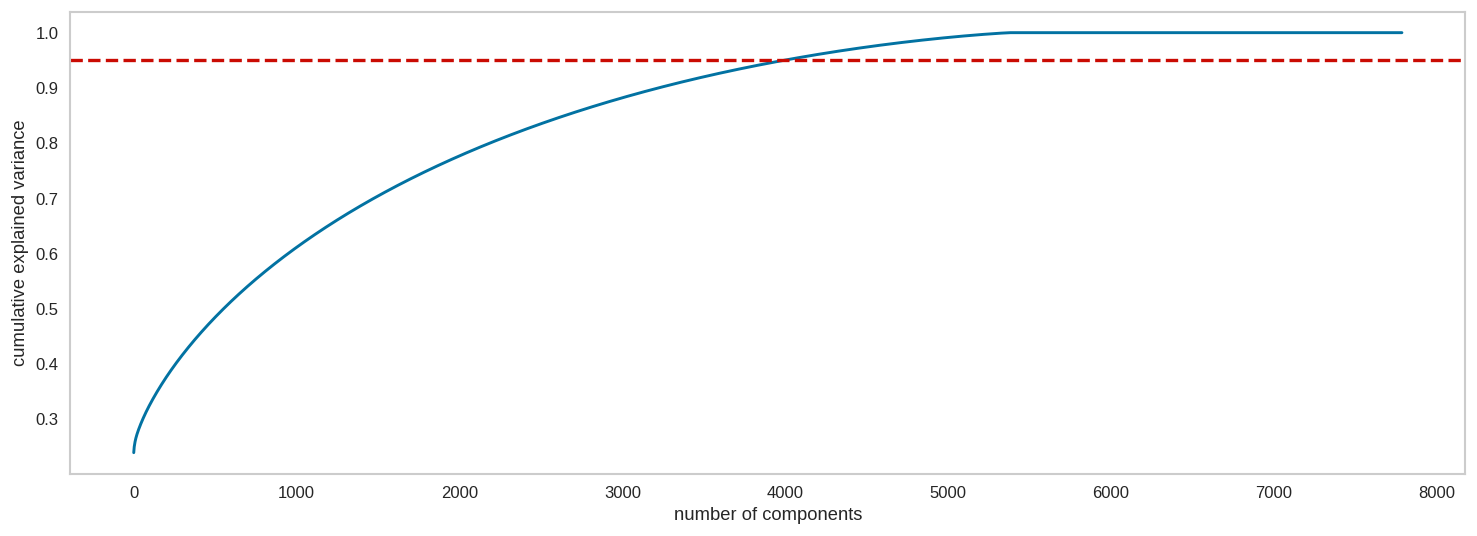

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5), dpi=120)
plt.plot(np.cumsum(transformer.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y=0.95, color='r', linestyle='--',linewidth=2, label='95% Explained Variance')
plt.grid()
plt.show()

This plot will  help us to determine the number of components to consider for dimensionality reduction.

 WE can also select the number of components where the cumulative explained variance reaches a satisfactory threshold, such as 95%.

The point where the curve intersects or is closest to the threshold line can guide you in choosing the appropriate number of components for your analysis.

In [ ]:
from sklearn.decomposition import PCA
# Create an instance of PCA with the desired explained variance ratio
pca_tuned = PCA(n_components=0.95)
# Fit the PCA model on the input data, X, which is converted to a dense array
pca_tuned.fit(X.toarray())
# Transform the input data, X, to its reduced dimensional representation
X_transformed = pca_tuned.transform(X.toarray())
# Print the shape of the transformed data to see the number of samples and transformed features
print(X_transformed.shape)

(7787, 3994)


In [ ]:
X_transformed

array([[ 6.97533001e-01,  7.00418414e-05,  4.55788688e-05, ...,
        -5.14985123e-07, -2.00398281e-07, -3.03821234e-07],
       [-3.05704006e-01, -3.37242200e-02,  2.28989279e-02, ...,
        -8.92900759e-03,  9.68325636e-03, -6.99828331e-03],
       [-3.07234756e-01, -3.32864052e-02, -1.76490520e-02, ...,
         1.88106700e-02,  3.99047535e-03,  2.13866163e-03],
       ...,
       [ 6.97533001e-01,  7.00418414e-05,  4.55788688e-05, ...,
        -5.14985123e-07, -2.00398281e-07, -3.03821234e-07],
       [ 6.97533001e-01,  7.00418414e-05,  4.55788688e-05, ...,
        -5.14985123e-07, -2.00398281e-07, -3.03821234e-07],
       [-3.18124110e-01,  3.02720202e-01,  1.93032475e-01, ...,
         4.43446159e-03, -1.90408766e-03, -1.04469964e-03]])

# **ML Model Implementation**

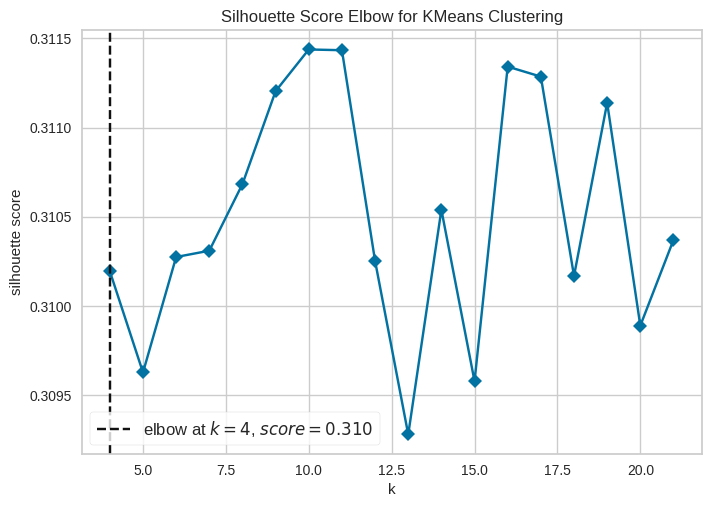

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Initialize the KMeans model with a random_state of 5
model = KMeans(random_state=5)

# Initialize the KElbowVisualizer with the KMeans model and desired parameters
visualizer = KElbowVisualizer(model, k=(4, 22), metric='silhouette', timings=False, locate_elbow=True)

# Fit the visualizer on the transformed data
visualizer.fit(X_transformed)

# Display the elbow plot
visualizer.show()

This plot will indicate the "elbow" point, which represents the recommended number of clusters based on the selected metrics

 While using the elbow plot with the optimal number of 4 clusters.

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score, silhouette_samples

def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      km = KMeans (n_clusters=n_clusters, random_state=5)
      preds = km.fit_predict(X_transformed)
      centers = km.cluster_centers_

      score = silhouette_score(X_transformed, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(X_transformed) # Fit the training data to the visualizer
      visualizer.poof()

For n_clusters = 2, silhouette score is 0.32307926655490005


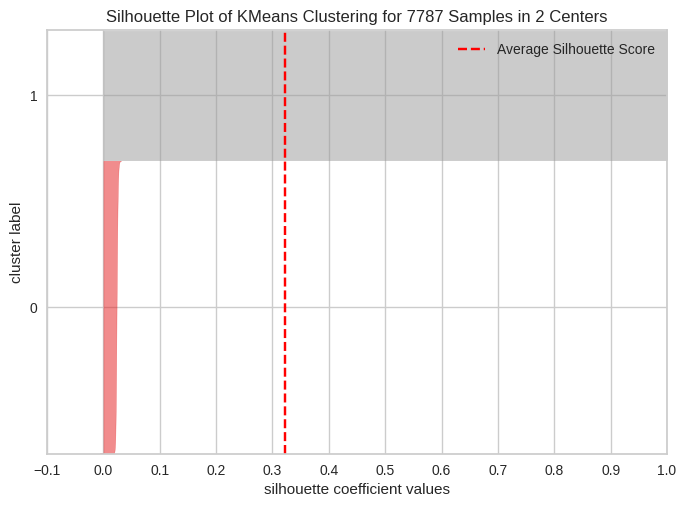

For n_clusters = 3, silhouette score is 0.30952617128989435


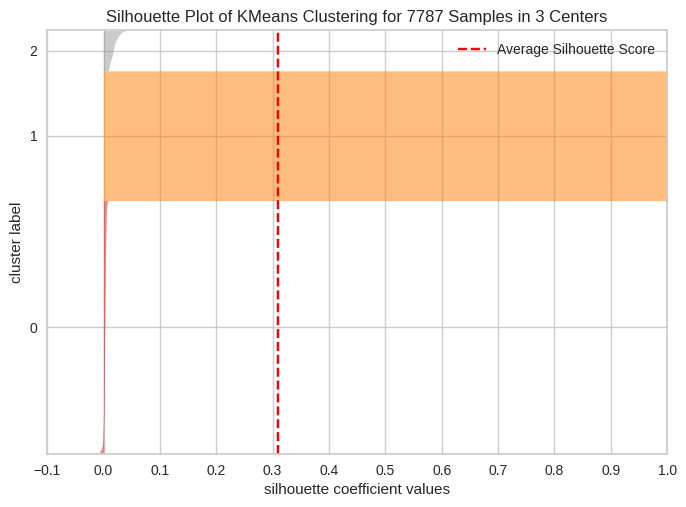

For n_clusters = 4, silhouette score is 0.3101945779282872


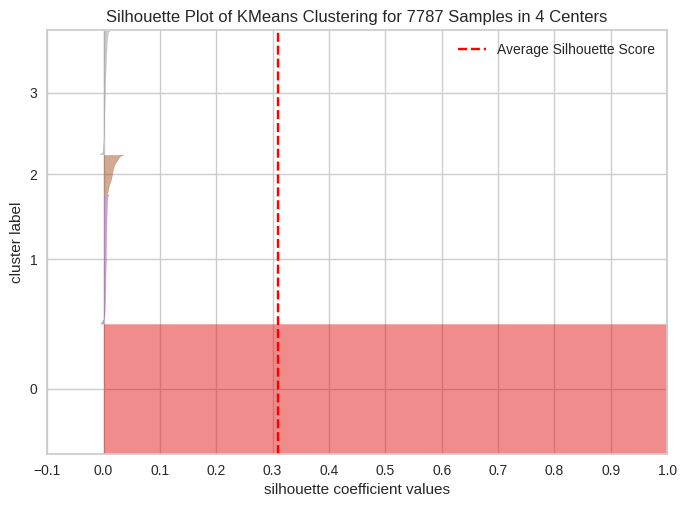

For n_clusters = 5, silhouette score is 0.3096270536019349


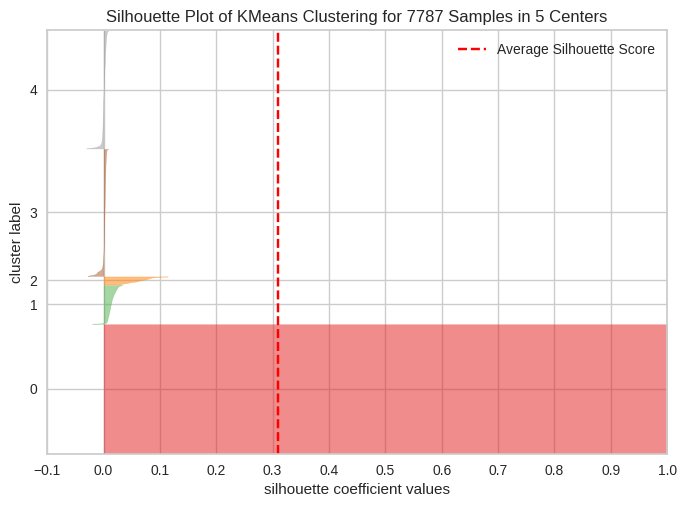

For n_clusters = 6, silhouette score is 0.31027448478793107


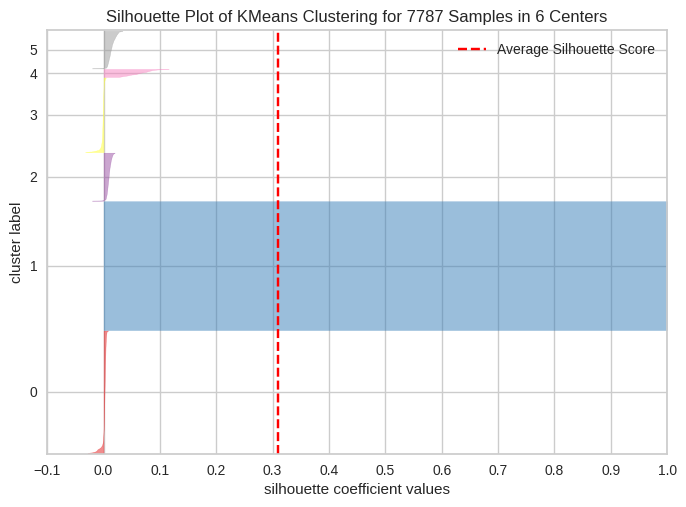

For n_clusters = 7, silhouette score is 0.31030981515263967


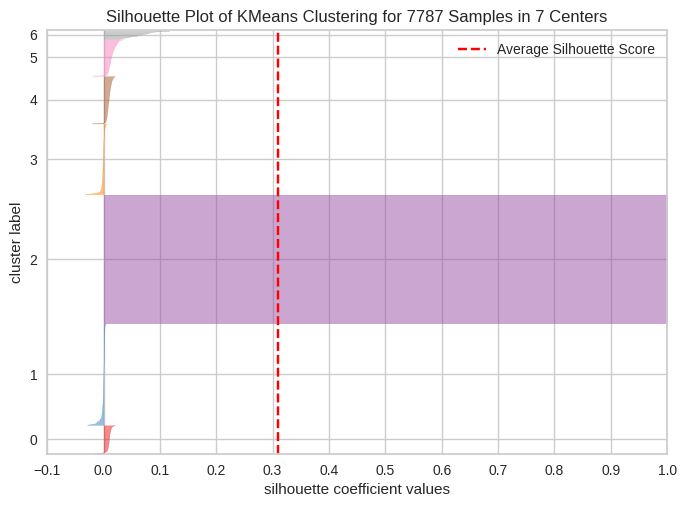

For n_clusters = 8, silhouette score is 0.31068363830810747


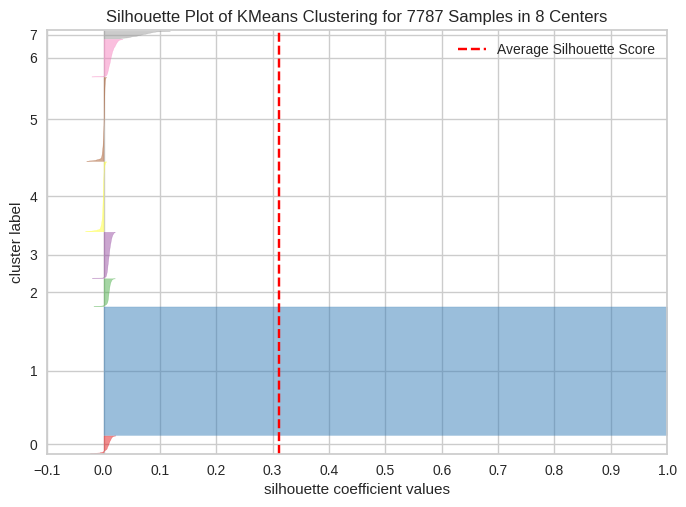

For n_clusters = 9, silhouette score is 0.3112046329294729


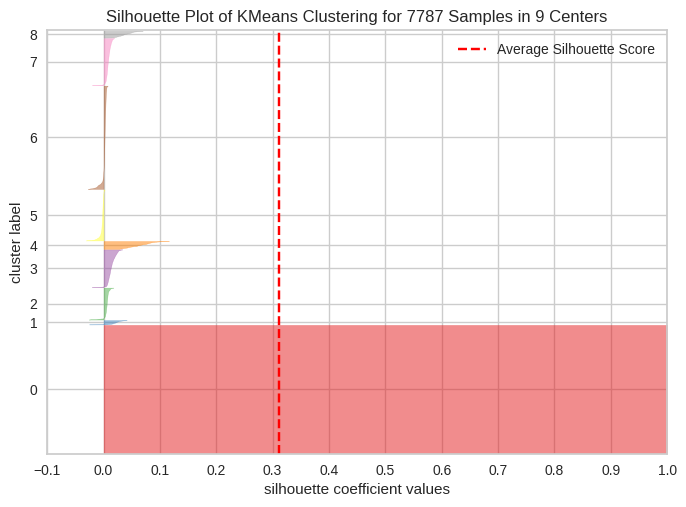

For n_clusters = 10, silhouette score is 0.31143842330855626


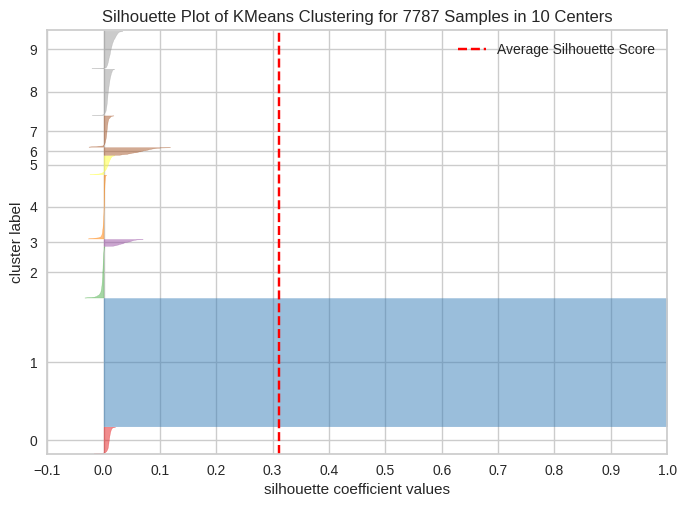

For n_clusters = 11, silhouette score is 0.311434250080159


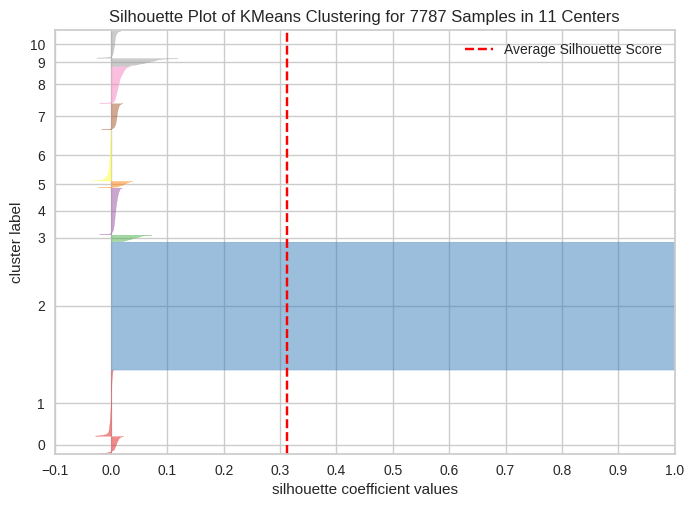

For n_clusters = 12, silhouette score is 0.3102524674689727


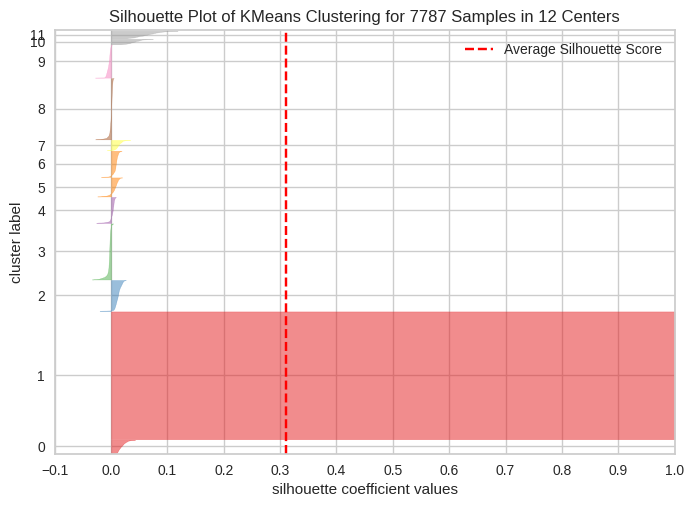

For n_clusters = 13, silhouette score is 0.3092792025175409


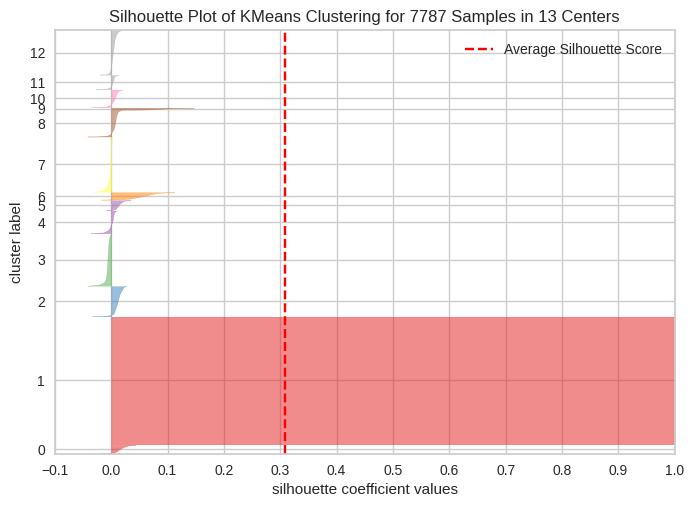

For n_clusters = 14, silhouette score is 0.3105394948317088


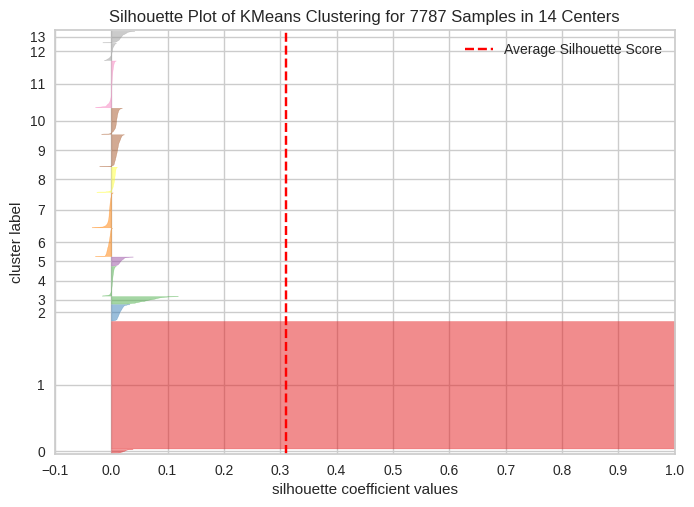

In [ ]:
silhouette_score_analysis(15)

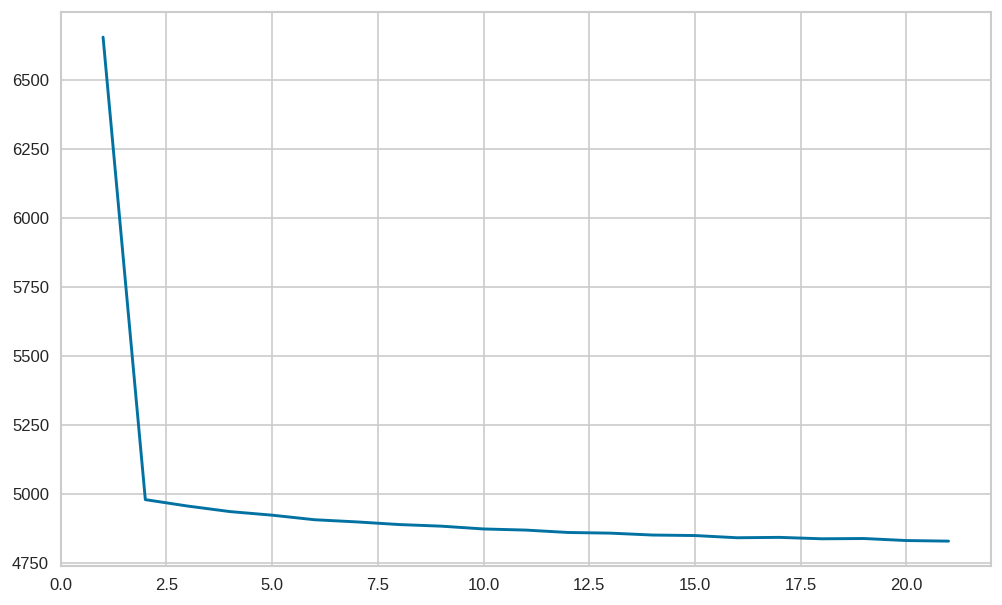

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Creating a figure with a specific size and resolution
plt.figure(figsize=(10, 6), dpi=120)

# Initializing an empty list to store the within-cluster sum of squares (WCSS)
wcss = []

# Iterating over different numbers of clusters
for i in range(1, 22):
    # Create a KMeans model with default parameters
    model = KMeans(random_state=0)

    # Initialize the KMeans algorithm with specific parameters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)

    # Fit the KMeans algorithm to the transformed data
    kmeans.fit(X_transformed)

    # Append the WCSS to the list
    wcss.append(kmeans.inertia_)

# Plotting the number of clusters against the WCSS
plt.plot(range(1, 22), wcss)

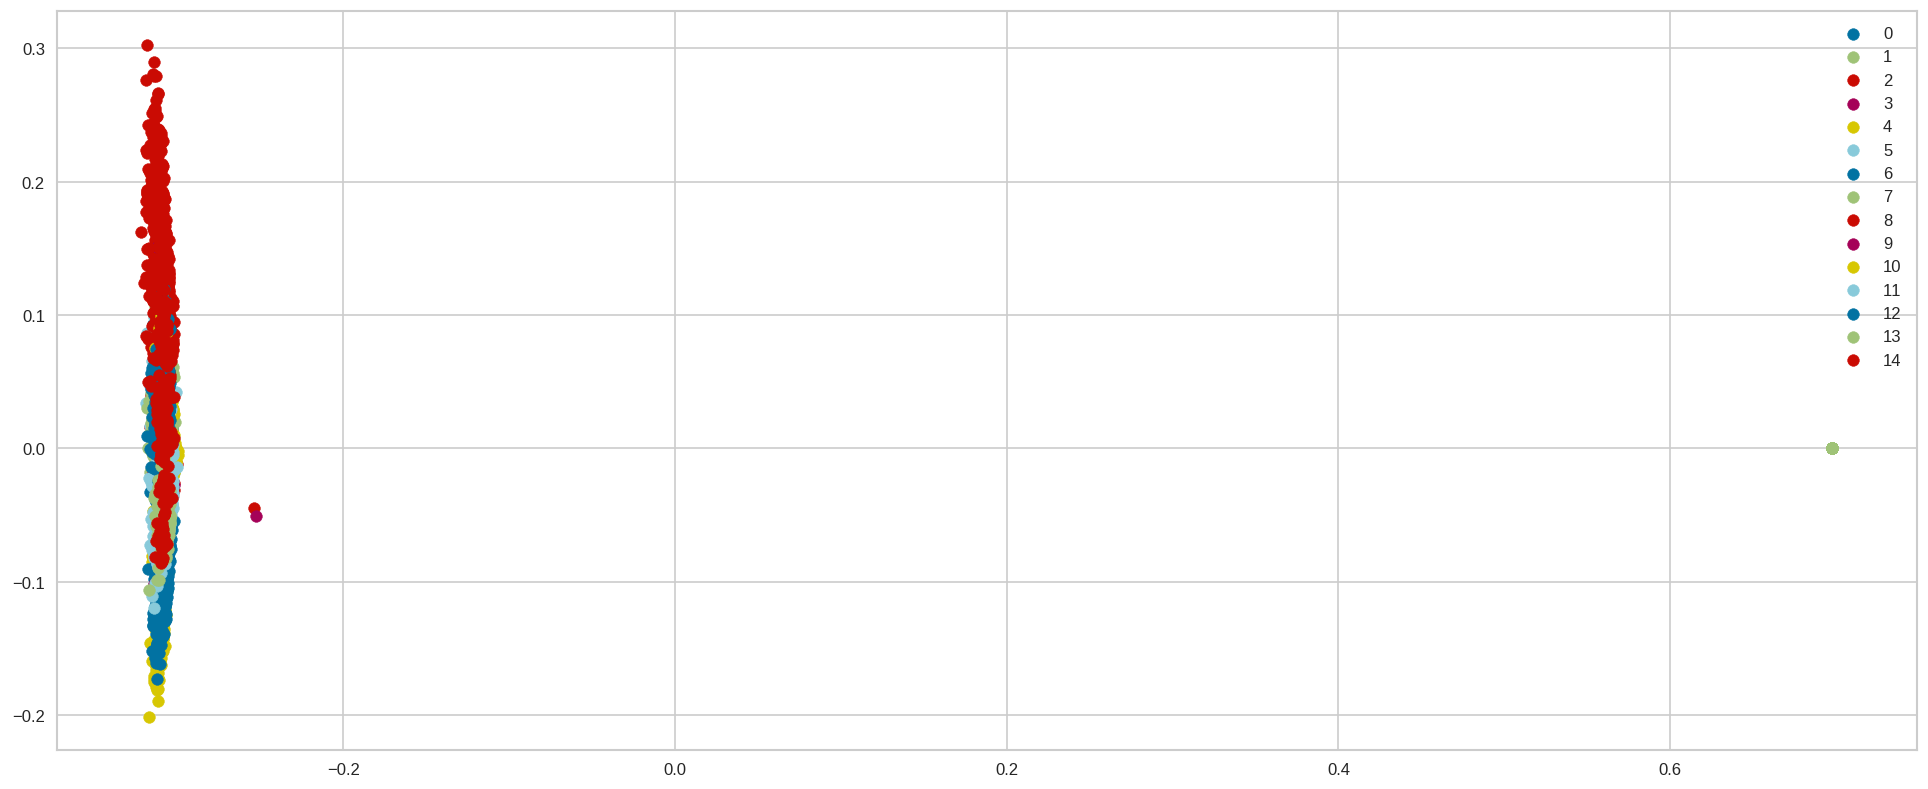

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Creating a figure with a larger size and resolution
plt.figure(figsize=(20, 8), dpi=120)

# Initializing a KMeans model with 15 clusters
kmeans = KMeans(n_clusters=15, init='k-means++', random_state=9)

# Fitting the KMeans algorithm to the transformed data
kmeans.fit(X_transformed)

# Predicting the labels of the clusters
label = kmeans.fit_predict(X_transformed)

# Getting unique labels from the predictions
unique_labels = np.unique(label)

# Plotting the results
for i in unique_labels:
    # Scatter plot the points belonging to each cluster
    plt.scatter(X_transformed[label == i, 0], X_transformed[label == i, 1], label=i)

# Displaying a legend to identify the clusters
plt.legend()

# Showing the plot
plt.show()

In [ ]:
# Adding cluster values to the dateframe.
dataset['cluster_number'] = kmeans.labels_

In [ ]:
dataset.head(1)

show_id     type title director  \
0      s1  TV Show    3%      NaN   

                                                cast country date_added  \
0  JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...  Brazil 2020-08-14   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   

                                         description  day_added  year_added  \
0  In a future where the elite inhabit an island ...       14.0      2020.0   

   month_added clustering Clean_Text  cluster_number  
0          8.0        nan        nan               1

In [ ]:
# Counting the number of movies or TV shows in each cluster
cluster_content_count = dataset['cluster_number'].value_counts().reset_index().rename(columns={'index': 'clusters', 'clusters': 'Movies/TV_Shows'})

# Printing the cluster content count
print(cluster_content_count)

    clusters  cluster_number
0          1            2389
1          7            1029
2         11             842
3          6             649
4          8             564
5          2             479
6          5             421
7         10             298
8         12             235
9         14             227
10         4             197
11         0             133
12        13             125
13         9             110
14         3              89


In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
def word_count(category):
  print("Exploring Cluster", category)
  col_names = ['type','title','country','rating','listed_in','description']
  for i in col_names:
    df_word_cloud = dataset[['cluster_number',i]].dropna()
    df_word_cloud = df_word_cloud[df_word_cloud['cluster_number']==category]
    text = " ".join(word for word in df_word_cloud[i])
    # Creating stopword list:
    stopwords = set(STOPWORDS)
  # Generating a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color="#FFC0CB",width=500,height=500).generate(text)
  # Displaying the generated image:
  # the matplotlib way:
    plt.rcParams["figure.figsize"] = (10,10)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

    print("Looking for insights from", i ,"Movies/TV Shows")

    plt.show()


Exploring Cluster 9
Looking for insights from type Movies/TV Shows


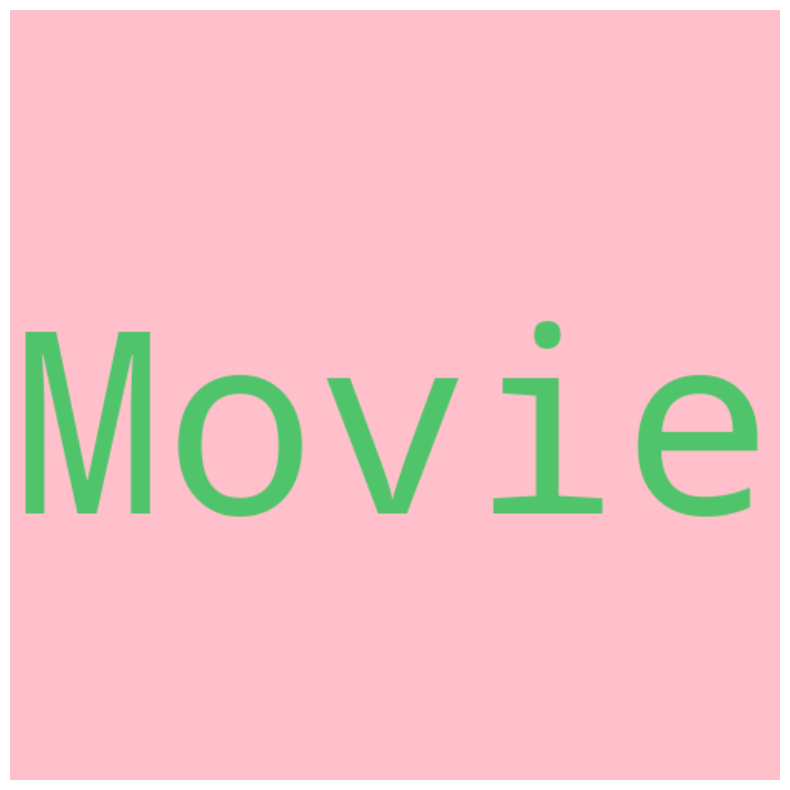

Looking for insights from title Movies/TV Shows


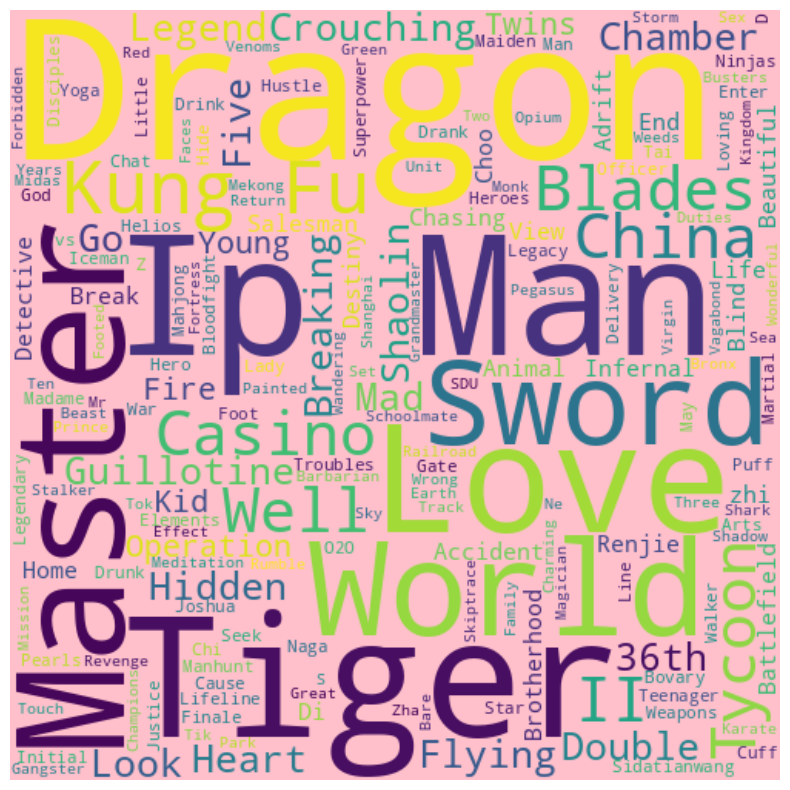

Looking for insights from country Movies/TV Shows


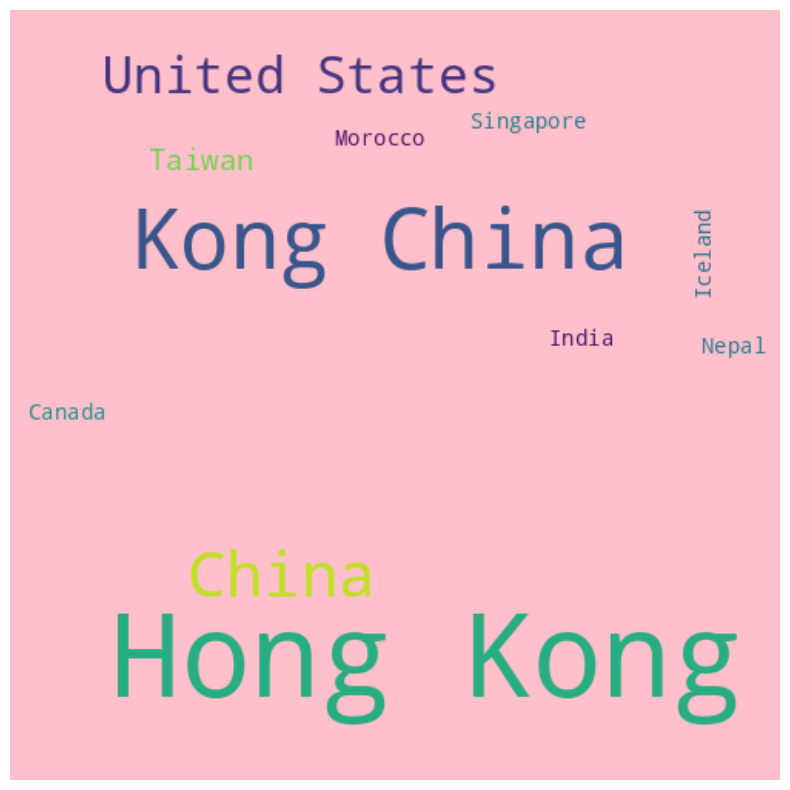

Looking for insights from rating Movies/TV Shows


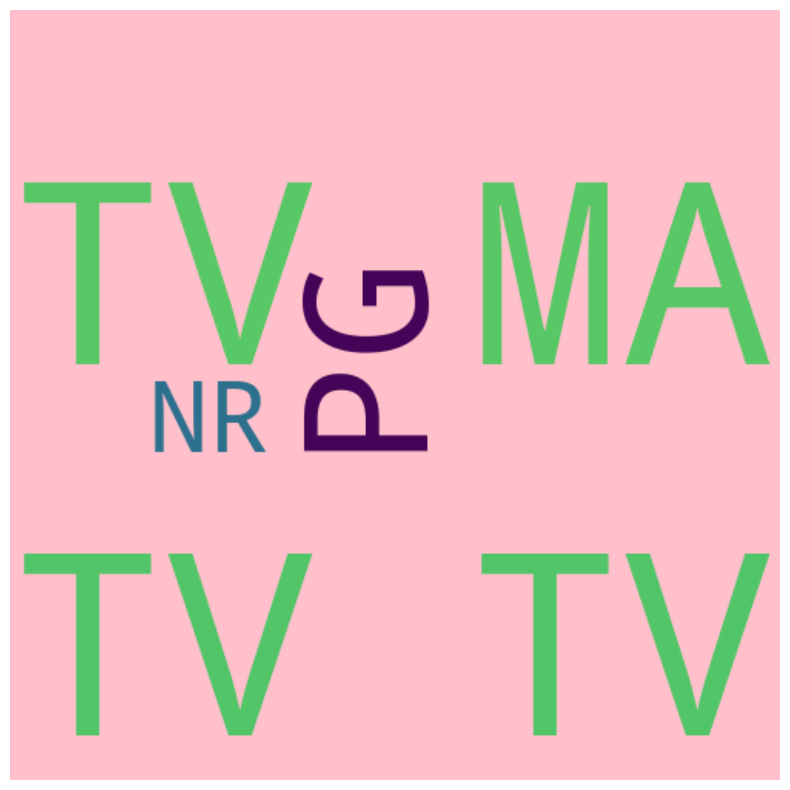

Looking for insights from listed_in Movies/TV Shows


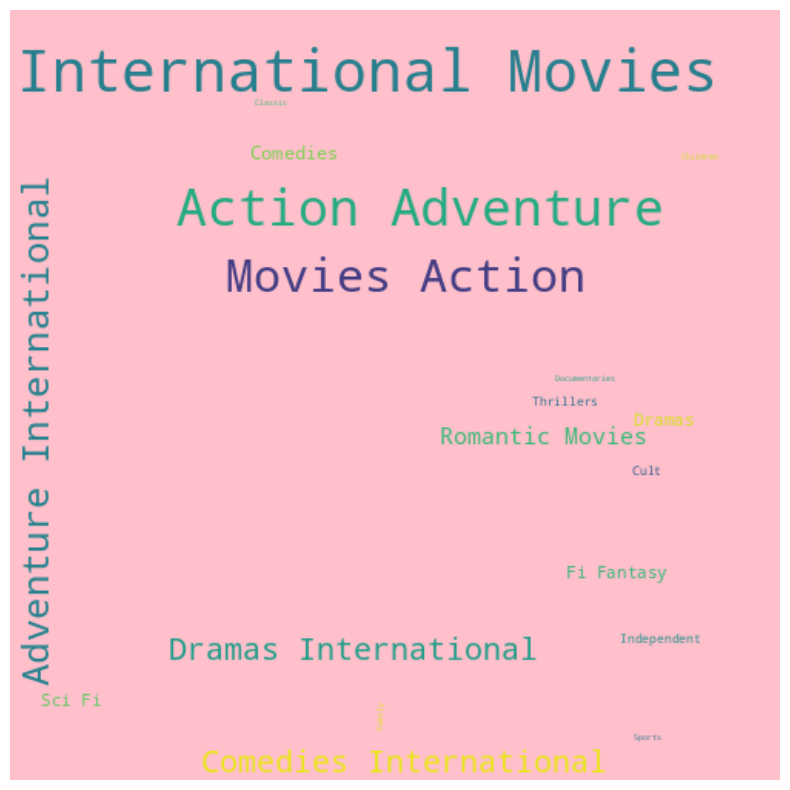

Looking for insights from description Movies/TV Shows


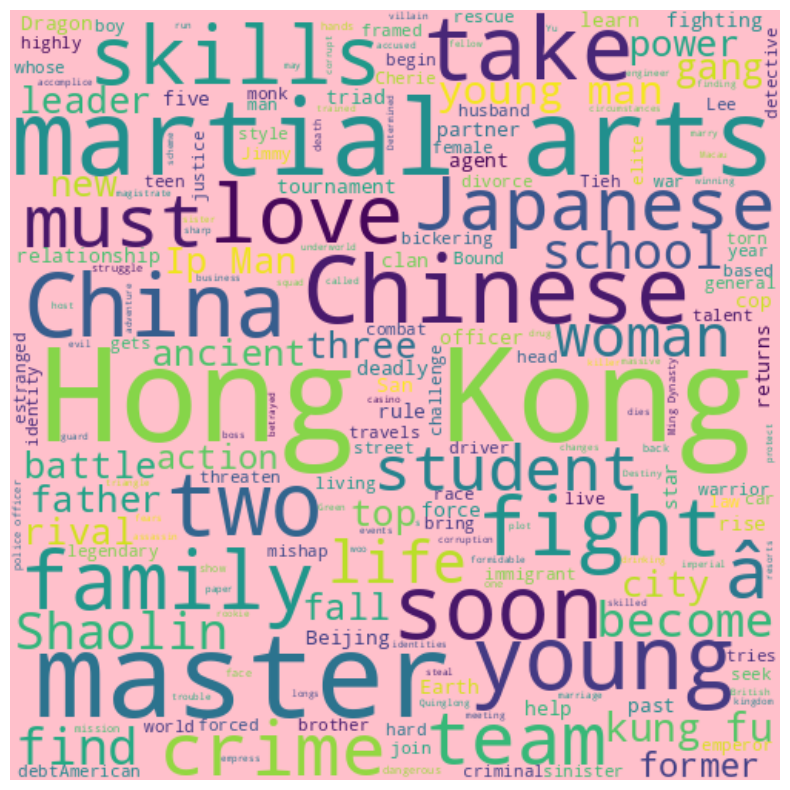

In [ ]:
word_count(9)

Exploring Cluster 11
Looking for insights from type Movies/TV Shows


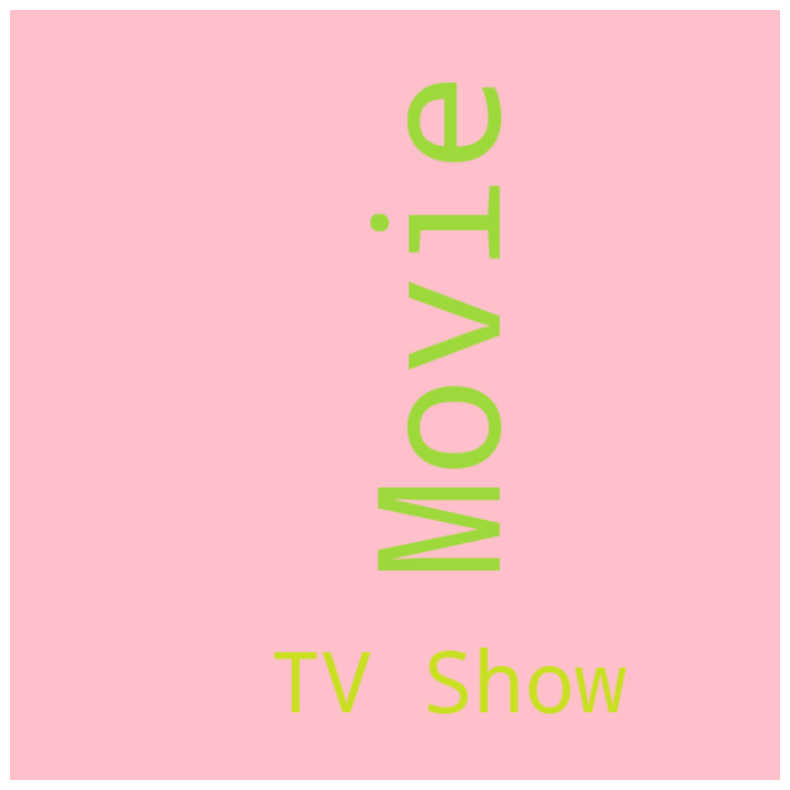

Looking for insights from title Movies/TV Shows


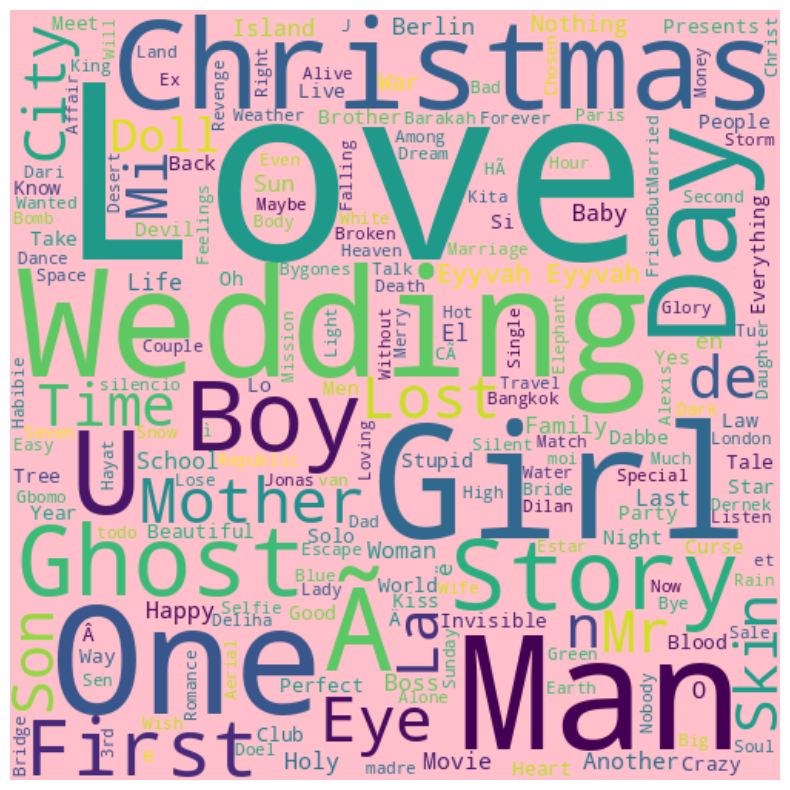

Looking for insights from country Movies/TV Shows


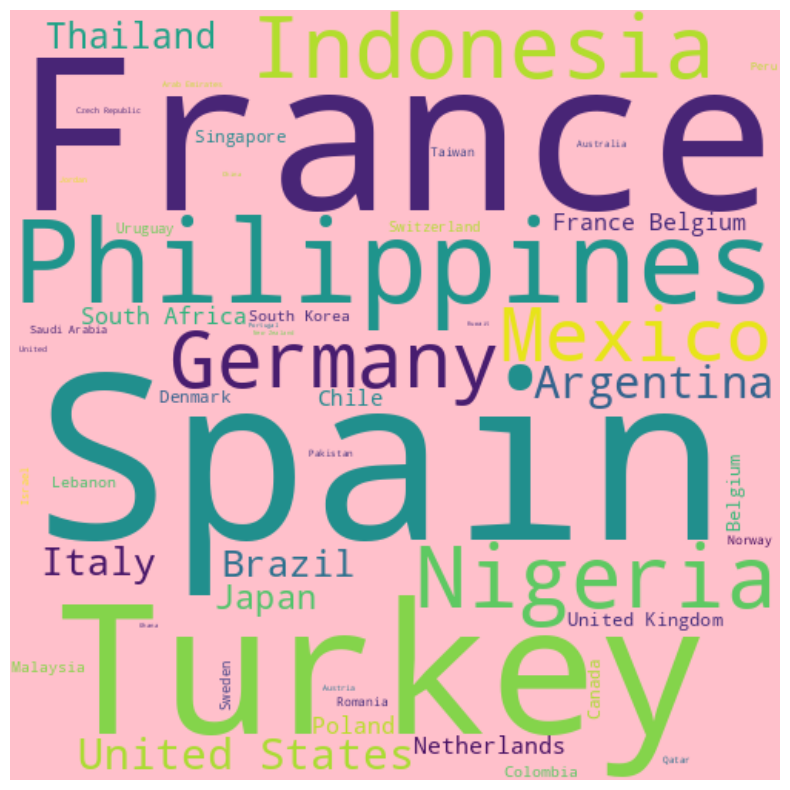

Looking for insights from rating Movies/TV Shows


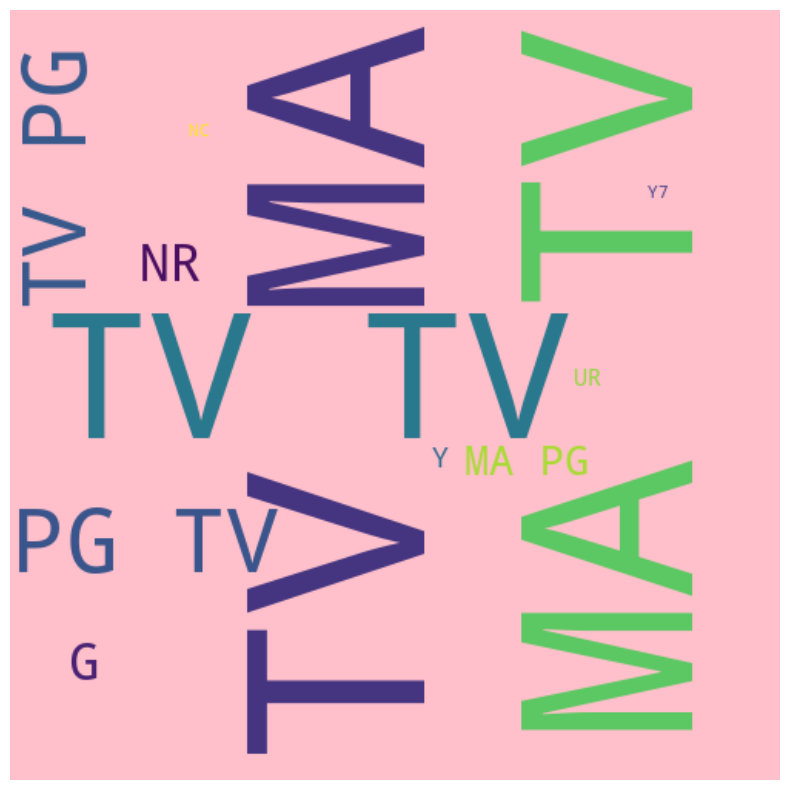

Looking for insights from listed_in Movies/TV Shows


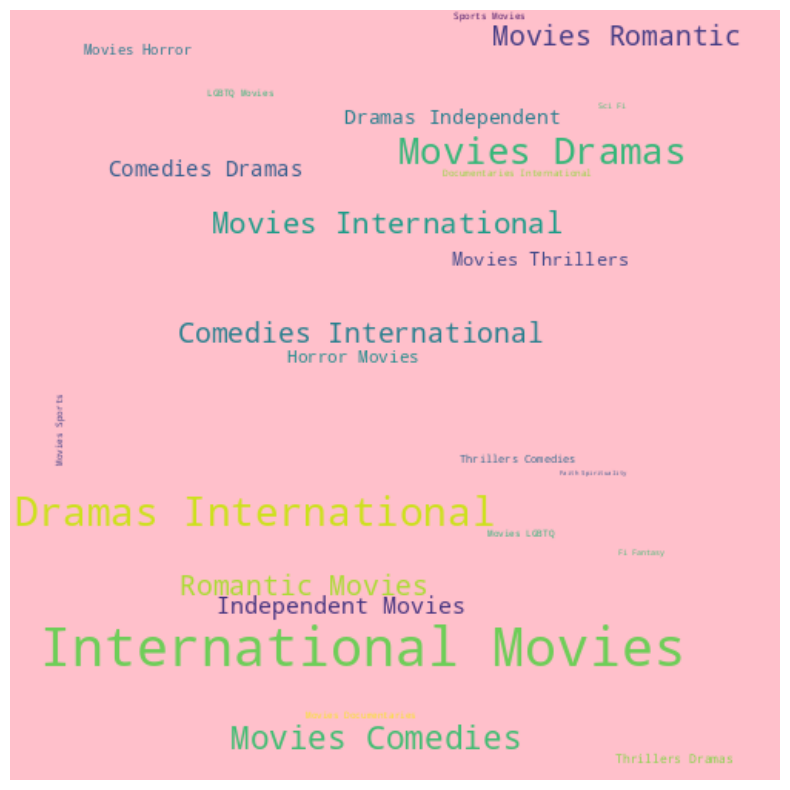

Looking for insights from description Movies/TV Shows


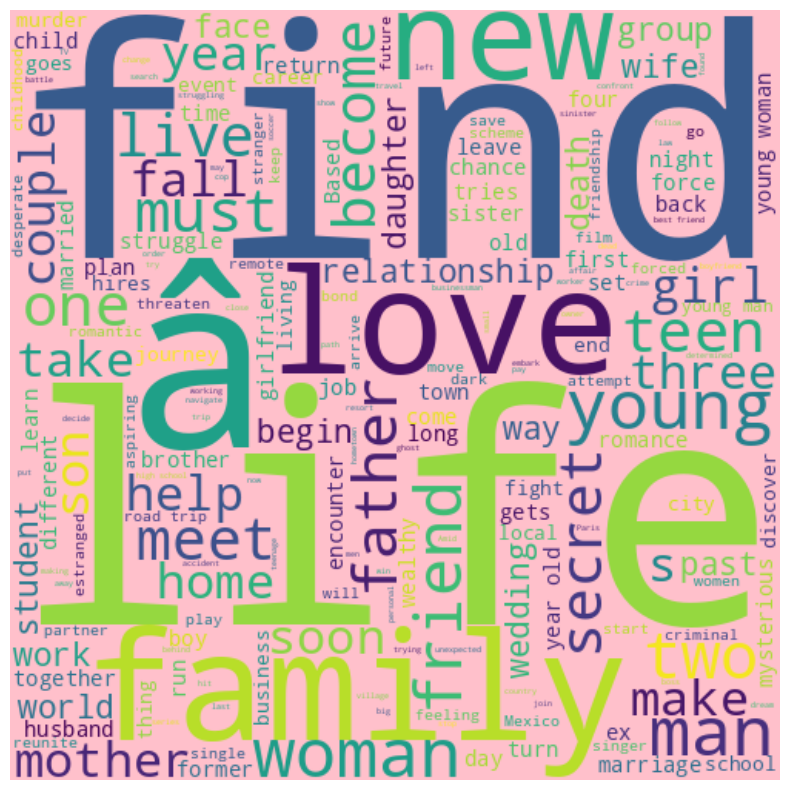

In [ ]:
word_count(11)

# **Recommender System**

What is Recommender System ?

A recommendation system is an artificial intelligence or AI algorithm, usually associated with machine learning, that uses Big Data to suggest or recommend additional products to consumers. These can be based on various criteria, including past purchases, search history, demographic information, and other factors.

Why is it important ?

A recommendation system is an artificial intelligence or AI algorithm, usually associated with machine learning, that uses Big Data to suggest or recommend additional products to consumers. These can be based on various criteria, including past purchases, search history, demographic information, and other factors.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
dataset['description'] = dataset['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(dataset['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(7787, 18122)

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
cosine_sim

array([[1.        , 0.        , 0.05822258, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.09596732, 0.        ,
        0.        ],
       [0.05822258, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.09596732, 0.        , ..., 1.        , 0.        ,
        0.0281592 ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.0281592 , 0.        ,
        1.        ]])

In [ ]:
indices = pd.Series(dataset.index, index=dataset['title']).drop_duplicates()

In [ ]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return dataset['title'].iloc[movie_indices]

In [ ]:
dataset['title'][1:70]

1                                                  7:19
2                                                 23:59
3                                                     9
4                                                    21
5                                                    46
                            ...                        
65                                              13 Sins
66                                                 13TH
67    13TH: A Conversation with Oprah Winfrey & Ava ...
68                                            14 Blades
69                                           14 Cameras
Name: title, Length: 69, dtype: object

In [ ]:
get_recommendations( '14 Cameras',cosine_sim)

5425        Scandal in Sorrento
2383                     Get In
541                        Anon
7568             What We Wanted
7095                 Time Share
1980          Elizabeth Harvest
6975               The Vanished
6084    The Angry Birds Movie 2
1092                   Breakout
5465      Secreto bien guardado
Name: title, dtype: object

# **Conclusion**

**EDA Insights:**


*   A lot of content has been added in the recent years, but from 2016 onwards a higher numer of TV Shows and Movies have been added in which Movies are higher in number.
*   By looking at the data about addition of content over the year, a higher numer of addition of content has been done during the first and last few months of the year.
*   On analysing the data, it was found that Movies are being watched more than TV Shows
*   Of all the TV Shows present, a majority of them have only 1 season.
*   It can be seen that most of the content available is from the Genre Documentaries and Stand-up Comedy.
*   Marcus Raboy and Jay Karas has the highest number of Movies and TV Shows present on the platform


**Clustering and Recommender System Insights:**


*   After applying K-means clustering on the dataset, we get a value as k=4 which is the optimal number of clusters formed.
*   The Silhouette Score for evaluation metric was chosen as it provides a comprehensible result and is less sensitive towards the shape of clusters.
*   A recommender system has been built that can assist the organisation to improve user experience and also enhance engagement in content of several genres based on their similarity scores.


**Future Work:**


*   An addition of data about Runtime,IMDB Scores,Number of people watched etc. would help elaborate the efficiency of the recommender system to significally increment user experience and engagement.
*   Introduction of TV Shows of good content would help lessen the gap between the number of Movies and TV Shows that are available to wach on the platform which would further promote user engagement.









